In [1]:
import pandas as pd
import re
import time
import datetime
import numpy as np


import matplotlib.pyplot as plt
from cycler import cycler


% matplotlib inline

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
df = pd.read_csv('classfications.csv')

In [4]:
df = df[~df.year.isin(['2001-01-01','2002-01-01', '2003-01-01'])]

In [5]:
df.head()

,title,year,type,abstract,main_class,sub_class,third_class
0,Sponsored stories and news stories within a ne...,2012-01-01,Grant,A social networking system generates socially-...,PHYSICS,COMPUTING; CALCULATING; COUNTING,"DATA PROCESSING SYSTEMS OR METHODS, SPECIALLY ..."
1,Methods and systems for storage of media item ...,2015-01-01,Grant,The various embodiments described herein inclu...,PHYSICS,COMPUTING; CALCULATING; COUNTING,ELECTRIC DIGITAL DATA PROCESSING
2,Native application testing,2016-01-01,Grant,"In one embodiment, a method includes deploying...",PHYSICS,COMPUTING; CALCULATING; COUNTING,"DATA PROCESSING SYSTEMS OR METHODS, SPECIALLY ..."
3,User search based on private information,2015-01-01,Grant,"In one embodiment, a method includes receiving...",PHYSICS,COMPUTING; CALCULATING; COUNTING,ELECTRIC DIGITAL DATA PROCESSING
4,Social context in augmented reality,2012-01-01,Grant,"In one embodiment, a method includes receiving...",PHYSICS,COMPUTING; CALCULATING; COUNTING,"DATA PROCESSING SYSTEMS OR METHODS, SPECIALLY ..."


In [39]:
df.groupby('year').main_class.value_counts()

year        main_class                                                  
2004-01-01  PHYSICS                                                         4  
2006-01-01  PHYSICS                                                         7  
            ELECTRICITY                                                     6  
2007-01-01  ELECTRICITY                                                     9  
            PHYSICS                                                         7  
2008-01-01  ELECTRICITY                                                     13 
            PHYSICS                                                         13 
2009-01-01  PHYSICS                                                         31 
            ELECTRICITY                                                     16 
2010-01-01  PHYSICS                                                         79 
            ELECTRICITY                                                     32 
2011-01-01  PHYSICS                            

In [40]:
s = df.groupby('year').main_class.value_counts()
s= s.unstack().fillna(0)
s= s.reset_index()

In [41]:
s.year = pd.to_datetime(s.year).dt.year

In [42]:
s.head()

main_class,year,ELECTRICITY,FIXED CONSTRUCTIONS,HUMAN NECESSITIES,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,PERFORMING OPERATIONS; TRANSPORTING,PHYSICS
0,2004,0.0,0.0,0.0,0.0,0.0,4.0
1,2006,6.0,0.0,0.0,0.0,0.0,7.0
2,2007,9.0,0.0,0.0,0.0,0.0,7.0
3,2008,13.0,0.0,0.0,0.0,0.0,13.0
4,2009,16.0,0.0,0.0,0.0,0.0,31.0


In [43]:
s

main_class,year,ELECTRICITY,FIXED CONSTRUCTIONS,HUMAN NECESSITIES,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,PERFORMING OPERATIONS; TRANSPORTING,PHYSICS
0,2004,0.0,0.0,0.0,0.0,0.0,4.0
1,2006,6.0,0.0,0.0,0.0,0.0,7.0
2,2007,9.0,0.0,0.0,0.0,0.0,7.0
3,2008,13.0,0.0,0.0,0.0,0.0,13.0
4,2009,16.0,0.0,0.0,0.0,0.0,31.0
5,2010,32.0,0.0,0.0,0.0,0.0,79.0
6,2011,104.0,0.0,0.0,0.0,1.0,128.0
7,2012,288.0,0.0,1.0,0.0,0.0,389.0
8,2013,209.0,0.0,2.0,0.0,0.0,374.0
9,2014,219.0,1.0,1.0,0.0,0.0,285.0


In [44]:
plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#ffffff',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
    
#   
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#ffffff',
# 'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

In [45]:
years = []
for i in range(2004,2019):
    if i != 2005:
        years.append(i)
years

[2004,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

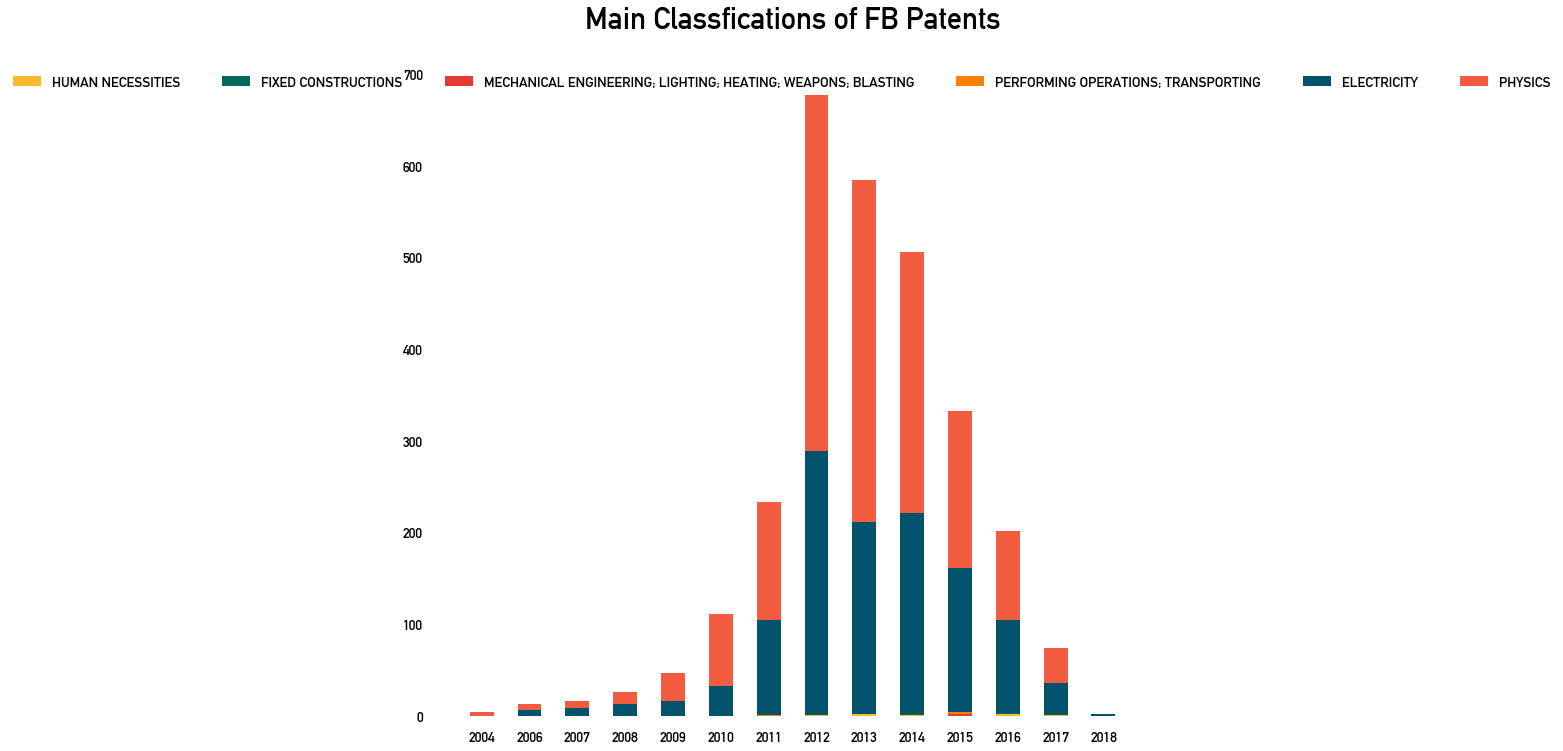

In [47]:
ax = s.plot(x='year',y=['HUMAN NECESSITIES','FIXED CONSTRUCTIONS','MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING',
                               'PERFORMING OPERATIONS; TRANSPORTING','ELECTRICITY','PHYSICS'
                        ],
            stacked = True,kind='bar',figsize=(12,12),color=['#f9ba32','#00695C','#E53935','#FF8000','#00526d','#f15b40'])
# ax.set_yscale('log')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=8, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.88),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
           bbox_transform=plt.gcf().transFigure)
plt.title("Main Classfications of FB Patents",pad = 35,loc='center',fontsize=30)

ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()
plt.savefig('main_class.pdf',bbox_inches='tight')

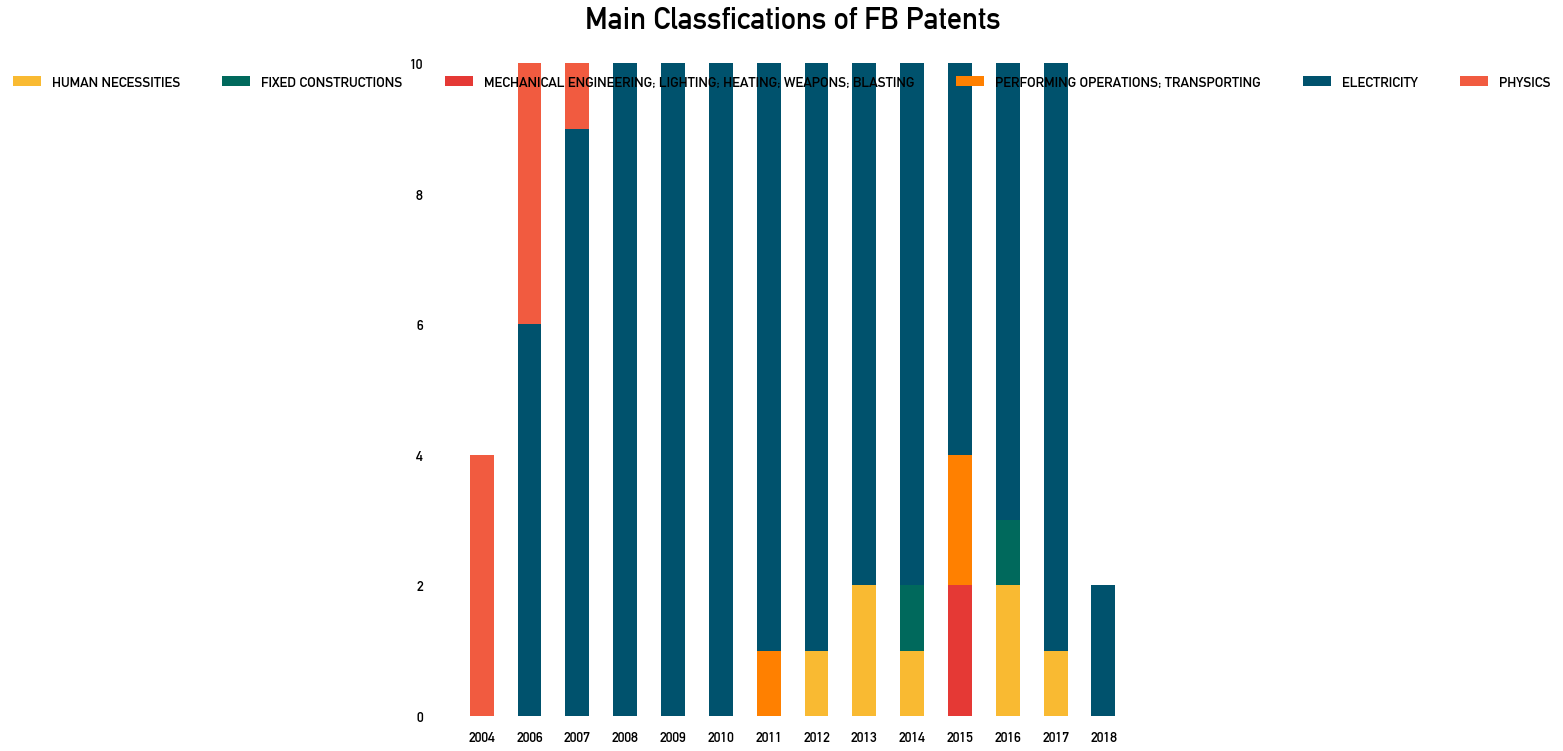

In [48]:
ax = s.plot(x='year',y=['HUMAN NECESSITIES','FIXED CONSTRUCTIONS','MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING',
                               'PERFORMING OPERATIONS; TRANSPORTING','ELECTRICITY','PHYSICS'
                        ],
            stacked = True,kind='bar',figsize=(12,12),color=['#f9ba32','#00695C','#E53935','#FF8000','#00526d','#f15b40'])
# ax.set_yscale('log')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=8, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.88),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
           bbox_transform=plt.gcf().transFigure)
plt.title("Main Classfications of FB Patents",pad = 35,loc='center',fontsize=30)

ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()
ax.set_ylim(0,10)

plt.savefig('main_class_zoom.pdf',bbox_inches='tight')

In [15]:
math.log(3)

1.0986122886681098

Text(0.5,0,'')

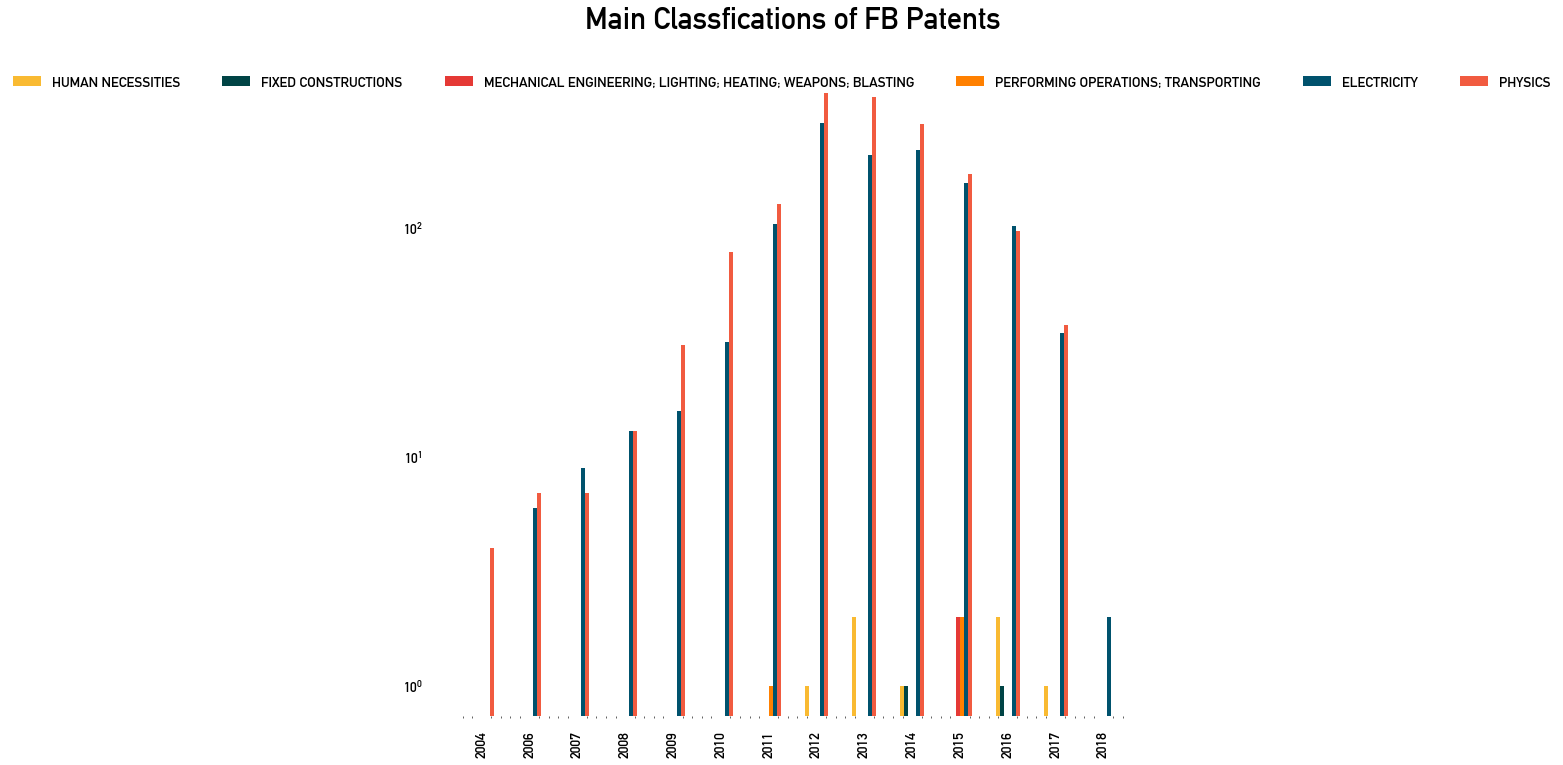

In [16]:
ax = s.plot(x='year',y=['HUMAN NECESSITIES','FIXED CONSTRUCTIONS','MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING',
                               'PERFORMING OPERATIONS; TRANSPORTING','ELECTRICITY','PHYSICS'
                        ],
            stacked = False,kind='bar',figsize=(12,12),color=['#f9ba32','#004445','#E53935','#FF8000','#00526d','#f15b40'])
ax.set_yscale('log')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=8, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.88),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
           bbox_transform=plt.gcf().transFigure)
plt.title("Main Classfications of FB Patents",pad = 35,loc='center',fontsize=30)

# ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")


In [17]:
df[df.main_class == 'FIXED CONSTRUCTIONS']

,title,year,type,abstract,main_class,sub_class,third_class
497,Strut hanger,2016-01-01,Grant,Technology is provided for a strut hanger for ...,FIXED CONSTRUCTIONS,BUILDING,"GENERAL BUILDING CONSTRUCTIONS; WALLS, e.g. PA..."
1230,Strut hanger,2014-01-01,Grant,Technology is provided for a strut hanger for ...,FIXED CONSTRUCTIONS,BUILDING,"GENERAL BUILDING CONSTRUCTIONS; WALLS, e.g. PA..."


In [18]:
pd.set_option('display.max_colwidth', -1)

In [19]:
#eye tracking, 
df[df.main_class =='HUMAN NECESSITIES']

,title,year,type,abstract,main_class,sub_class,third_class
430,Systems and methods of eye tracking calibration,2017-01-01,Grant,"Methods and systems to facilitate eye tracking control calibration are provided. One or more objects are displayed on a display of a device, where the one or more objects are associated with a function unrelated to a calculation of one or more calibration parameters. The one or more calibration parameters relate to a calibration of a calculation of gaze information of a user of the device, where the gaze information indicates where the user is looking. While the one or more objects are displayed, eye movement information associated with the user is determined, which indicates eye movement of one or more eye features associated with at least one eye of the user. The eye movement information is associated with a first object location of the one or more objects. The one or more calibration parameters are calculated based on the first object location being associated with the eye movement information.",HUMAN NECESSITIES,MEDICAL OR VETERINARY SCIENCE; HYGIENE,DIAGNOSIS; SURGERY; IDENTIFICATION
520,Techniques to interact with an application via messaging,2016-01-01,Grant,"Techniques to interact with an application via messaging are described. An apparatus may comprise an application support component and a communication component. The application support component may be operative to generate an image representing a state of an application and to update the state of the application according to a text command. The communication component may be operative to transmit the image to a client device via a messaging system as an image attachment to a first message and to receive a second message from the client device via the messaging system, the second message comprising the text command. Other embodiments are described and claimed.",HUMAN NECESSITIES,SPORTS; GAMES; AMUSEMENTS,"CARD, BOARD, OR ROULETTE GAMES; INDOOR GAMES USING SMALL MOVING PLAYING BODIES; VIDEO GAMES; GAMES NOT OTHERWISE PROVIDED FOR"
643,Systems and methods of eye tracking calibration,2014-01-01,Grant,"Methods and systems to facilitate eye tracking control calibration are provided. One or more objects are displayed on a display of a device, where the one or more objects are associated with a function unrelated to a calculation of one or more calibration parameters. The one or more calibration parameters relate to a calibration of a calculation of gaze information of a user of the device, where the gaze information indicates where the user is looking. While the one or more objects are displayed, eye movement information associated with the user is determined, which indicates eye movement of one or more eye features associated with at least one eye of the user. The eye movement information is associated with a first object location of the one or more objects. The one or more calibration parameters are calculated based on the first object location being associated with the eye movement information.",HUMAN NECESSITIES,MEDICAL OR VETERINARY SCIENCE; HYGIENE,DIAGNOSIS; SURGERY; IDENTIFICATION
747,Suggesting friends for playing a game,2016-01-01,Grant,"Exemplary methods, apparatuses, and systems provide a suggested list of people for a user of a social network system to play a game with. A social networking system receives a trigger for providing the user access from a user device to the game over a network. The social networking system identifies a pool of people who have a personal connection with the user and who have not played the game before. From the pool of people, a suggested list of people is selected based on closeness to the user. The suggested list is sent to the user device for the user device for the user to selectively invite one or more of the people to play the game.",HUMAN NECESSITIES,SPORTS; GAMES; AMUSEMENTS,"CARD, BOARD, OR ROULETTE GAMES; INDOOR GAMES USING SMALL MOVING PLAYING BODIES; VIDEO GAMES; GAMES NOT OTHERWISE PROVIDE

In [20]:
#Robots
#Lighting
df[df.main_class =='MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING']

,title,year,type,abstract,main_class,sub_class,third_class
496,Torque limiting clutch for use with robot arm,2015-01-01,Grant,"Technology is provided for a torque limiting clutch for use with a robot arm. The torque limiting clutch includes a hub including a hub flange and a clamp plate slideably mounted on the hub. A drive member is rotatably mounted on the hub between the hub flange and the clamp plate. The drive member includes a plurality of gear teeth disposed around an annular clutch disc. A first friction disc is positioned between the hub flange and the annular clutch disc, and a second friction disc is positioned between the clamp plate and the annular clutch disc. A plurality of clamp fasteners extend through the hub flange and engage the clamp plate to exert a clamping force operative to urge the clamp plate toward the hub flange, thereby pressing the friction discs against the annular clutch disc in order to transfer torque between the gear teeth and the hub.",MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,ENGINEERING ELEMENTS AND UNITS; GENERAL MEASURES FOR PRODUCING AND MAINTAINING EFFECTIVE FUNCTIONING OF MACHINES OR INSTALLATIONS; THERMAL INSULATION IN GENERAL,COUPLINGS FOR TRANSMITTING ROTATION; CLUTCHES; BRAKES
740,Method and system for generating light pattern using polygons,2015-01-01,Grant,"A method and system for generating light pattern using reflective polygons are provided herein. The method may include: rotating at least one polygon having a plurality of reflective facets along a rotation axis parallel to the facets; transmitting a light beam on the facets of the polygon; tilting the light beam relative to the polygon in parallel to the rotation axis so that the light beam hits each of the facets at a different tilt angle, thereby producing a light pattern comprising a plurality of lines; and controlling at least one of: the light intensity, the rotating, and the tilting, so as to produce an adjustable light pattern transmitted at a scene.",MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,LIGHTING,"FUNCTIONAL FEATURES OR DETAILS OF LIGHTING DEVICES OR SYSTEMS THEREOF; STRUCTURAL COMBINATIONS OF LIGHTING DEVICES WITH OTHER ARTICLES, NOT OTHERWISE PROVIDED FOR"


In [21]:
 df[df.main_class =='PERFORMING OPERATIONS; TRANSPORTING']

,title,year,type,abstract,main_class,sub_class,third_class
105,Air flow cooling system and self balancing robot incorporating the same,2015-01-01,Grant,"Technology is provided for an air flow cooling system and self-balancing robot incorporating the same. The robot includes a body, a robot controller disposed in the body, and a pair of axle housings extending from the body, each containing a drive assembly. An arm extends from the body and supports a head unit. A plurality of intake fans are disposed in the body and are configured to draw air into the body, thereby pressurizing the body, axle housings, and head unit. An axle fan is disposed in at least one of the pair of axle housings and is configured to exhaust air from the axle housings.",PERFORMING OPERATIONS; TRANSPORTING,HAND TOOLS; PORTABLE POWER-DRIVEN TOOLS; MANIPULATORS,MANIPULATORS; CHAMBERS PROVIDED WITH MANIPULATION DEVICES
222,Self-balancing robot,2015-01-01,Grant,"Technology is provided for a self-balancing robot that transitions from a three-wheeled mode to a two-wheeled self-balancing mode. The robot includes a body and a pair of drive wheels located at a first end portion of the body. Each drive wheel is coupled to a drive assembly operative to propel the robot along a surface. A third wheel is located on the body at a second end portion opposite the first end portion. A main arm is coupled to the body, wherein the main arm is rotatable to confront the surface and lift the third wheel away from the surface, thereby standing the body up onto the pair of drive wheels in preparation for self-balancing.",PERFORMING OPERATIONS; TRANSPORTING,LAND VEHICLES FOR TRAVELLING OTHERWISE THAN ON RAILS,MOTOR VEHICLES; TRAILERS
2090,Cabinet anchor bolt assembly,2011-01-01,Grant,An anchor bolt assembly for securing a cabinet and other structures to a sub-floor. A bolt with coaxial upper and lower threaded bores receives a threaded member from above and secures it to a threaded member from below. The upper threaded bore allows the cabinet to be secured to the upper floor. The lower threaded bore provides a securing means for the anchor bolt and its attachments through coupling the threaded bolt from the upper threaded bore to a threaded member protruding from the sub-floor. This threaded member engages the lower threaded bore. The threaded bores of the bolt provide two areas of stabilization against shear and torsional stresses along the axis of the anchor bolt assembly.,PERFORMING OPERATIONS; TRANSPORTING,HAND TOOLS; PORTABLE POWER-DRIVEN TOOLS; MANIPULATORS,"TOOLS OR BENCH DEVICES NOT OTHERWISE PROVIDED FOR, FOR FASTENING, CONNECTING, DISENGAGING OR HOLDING"


In [334]:
 df[df.main_class =='FIXED CONSTRUCTIONS']

,title,year,type,abstract,main_class,sub_class,third_class
497,Strut hanger,2016-01-01,Grant,"Technology is provided for a strut hanger for connecting a strut to a hanger rod includes a hook portion configured to engage the exterior surface of the hanger rod, a lever portion, a fulcrum disposed between the hook portion and lever portion, and a strut tab extending from the lever portion and configured to engage a strut. Load placed on the strut tab causes the lever portion to act against the fulcrum to force the hook portion against the hanger rod, thereby supporting the strut from the hanger rods without fasteners attached to the hanging rods. The strut hanger can include a clip extending from the lever portion to engage the hanger rod and maintain a minimum load on the lever.",FIXED CONSTRUCTIONS,BUILDING,"GENERAL BUILDING CONSTRUCTIONS; WALLS, e.g. PARTITIONS; ROOFS; FLOORS; CEILINGS; INSULATION OR OTHER PROTECTION OF BUILDINGS"
1230,Strut hanger,2014-01-01,Grant,"Technology is provided for a strut hanger for connecting a strut to a hanger rod includes a hook portion configured to engage the exterior surface of the hanger rod, a lever portion, a fulcrum disposed between the hook portion and lever portion, and a strut tab extending from the lever portion and configured to engage a strut. Load placed on the strut tab causes the lever portion to act against the fulcrum to force the hook portion against the hanger rod, thereby supporting the strut from the hanger rods without fasteners attached to the hanging rods. The strut hanger can include a clip extending from the lever portion to engage the hanger rod and maintain a minimum load on the lever.",FIXED CONSTRUCTIONS,BUILDING,"GENERAL BUILDING CONSTRUCTIONS; WALLS, e.g. PARTITIONS; ROOFS; FLOORS; CEILINGS; INSULATION OR OTHER PROTECTION OF BUILDINGS"


**Electricity class breakdown**

In [172]:

elec = df[df.main_class =='ELECTRICITY']
elec.head()

,title,year,type,abstract,main_class,sub_class,third_class
10,Social network site recommender system and method,2016-01-01,Grant,"A document management system monitors proposed recipients for documents and provides recommendations on alterations to the distribution set, such as by adding or removing recipients.",ELECTRICITY,ELECTRIC COMMUNICATION TECHNIQUE,"TRANSMISSION OF DIGITAL INFORMATION, e.g. TELEGRAPHIC COMMUNICATION"
11,Proximity synchronization of audio content among multiple playback and storage devices,2011-01-01,Grant,"A wireless communication system and in particular to a wireless communication system for digital audio players that provides for increased functionality, such as communication, interaction and synchronization between a computing platform and various mobile, portable or fixed digital audio players, as well as providing a communication link between the various digital audio players themselves. The computing platform may act, for example, through a wireless network or wireless communication platform, to control the digital audio players; to act as a cache of digital audio data for the digital audio players; as well as provide a gateway to the Internet to enable the digital audio players to access additional digital audio content and other information.",ELECTRICITY,ELECTRIC COMMUNICATION TECHNIQUE,BROADCAST COMMUNICATION
12,Managing electronic messages sent to reply telephone numbers,2014-01-01,Grant,A graphical user interface on a display device of a computer enables communications using a computer service. The graphical user interface includes a list of potential message recipients selected by a user as significant to the user. The graphical user interface also includes a mobile device identifier associated with one or more of the listed potential message recipients and a user account identifier associated with one or more of the listed potential message recipients. At least one of the listed potential recipients includes a mobile device identifier as the only available conduit for data delivery to the potential message recipient using the computer service.,ELECTRICITY,ELECTRIC COMMUNICATION TECHNIQUE,"TRANSMISSION OF DIGITAL INFORMATION, e.g. TELEGRAPHIC COMMUNICATION"
13,Fine and coarse parameter beam forming,2016-01-01,Grant,"Methods, systems and apparatuses for selecting parameters of a beam are disclosed. One method includes selecting, by a network controller of a wireless network, coarse beam parameters of each of a plurality of antenna arrays of a first node or a second node of the wireless network based on one or more static parameters of the first node and the second node, selecting, by at least one of the first node or the second node of the wireless network, fine beam parameters of each of the plurality of antenna arrays of the first node or the second node based on perturbations to dynamic parameters of at least one wireless link between the first node and the second node, and forming at least one beam by at least one of the first node or the second node using the coarse beam parameters and the fine beam parameters.",ELECTRICITY,ELECTRIC COMMUNICATION TECHNIQUE,TRANSMISSION
14,Data replication in a tree based server architecture,2015-01-01,Grant,"The disclosure is directed to data replication in a distributed computing system. The data, e.g., received from a client, is replicated to a first set of servers (“sync replica set”) synchronously and to a second set of servers asynchronously (“async tree”). A server can be a primary, secondary or a follower server. A sync replica set includes a primary server and one or more secondary servers. The async tree includes multiple follower servers deployed in a tree structure. A primary server can replicate the data to the secondary servers synchronously, and the secondary servers can replicate the data to one or more follower servers, e.g., a root node of the async tree, asynchronously. The root node then replicates the data to children of the root no

In [315]:
elec[elec.sub_class == 'ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR']

,title,year,type,abstract,main_class,sub_class,third_class
25,"Modular network switches, associated structures, and associated methods of manufacture and use",2016-01-01,Grant,"Modular network switches and other computer systems are described herein. A modular network switch can include a latching device for installing and removing computer modules (e.g., line cards) from an associated cabinet or enclosure. The network switch can also include interconnected computer modules (e.g., line cards, fabric cards, control modules, etc.) that include circuit boards oriented parallel to the flow of cooling air through the cabinet in the absence of a backplane or midplane oriented perpendicular to the air flow. The absence of such backplanes and/or midplanes provides a more direct air flow path through the cabinet, thereby enabling a more efficient flow of cooling air and lower operating temperatures. Additionally, the network switch can include an orthogonal arrangement of data planes, control planes, and/or power planes that can be efficiently interconnected to increase operational speed and further facilitate the flow of cooling air through the computer cabinet.",ELECTRICITY,ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR,PRINTED CIRCUITS; CASINGS OR CONSTRUCTIONAL DETAILS OF ELECTRIC APPARATUS; MANUFACTURE OF ASSEMBLAGES OF ELECTRICAL COMPONENTS
99,Power connection clip for a shelf in a server rack,2015-01-01,Grant,"Various embodiments include a power connection clip to electrically couple a power distribution board of an information technology (IT) equipment shelf to a plurality of power rails/buses in a server rack. The power connection clip can include a clip body having an inner portion and an outer portion, a shelf coupler, and an electrical conductor pair. The outer portion can include at least two clip fins separated from a central stump to form at least two cavities. The shelf coupler can couple the clip body to the IT equipment shelf. The electrical conductor pair can sandwich at least the inner portion of the clip body. The electrical conductor pair is adapted to carry high-voltage direct current (HVDC) voltage. The cavities can be covered with electrical conductors. The electrical conductors in the cavities can be adapted to carry IT-usable direct current (DC) voltage.",ELECTRICITY,ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR,PRINTED CIRCUITS; CASINGS OR CONSTRUCTIONAL DETAILS OF ELECTRIC APPARATUS; MANUFACTURE OF ASSEMBLAGES OF ELECTRICAL COMPONENTS
119,Cable management system,2016-01-01,Grant,A cable management system including a cable management panel comprising sheet metal having a plurality of parallel concave grooves and a pair of mounting flanges configured for mounting the panel to a rack. A plurality of magnetic cable rings are each magnetically attached to a corresponding one of the plurality of parallel concave grooves. Each cable ring includes a pair of ring halves magnetically attached to each other. At least one of the pair of ring halves comprises a magnetized material whereby one or more cables can be positioned between the pair of ring halves and secured to the cable management panel.,ELECTRICITY,ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR,PRINTED CIRCUITS; CASINGS OR CONSTRUCTIONAL DETAILS OF ELECTRIC APPARATUS; MANUFACTURE OF ASSEMBLAGES OF ELECTRICAL COMPONENTS
166,"Modular network switches, associated structures, and associated methods of manufacture and use",2016-01-01,Grant,"Modular network switches and other computer systems are described herein. A modular network switch can include a latching device for installing and removing computer modules (e.g., line cards) from an associated cabinet or enclosure. The network switch can also include interconnected computer modules (e.g., line cards, fabric cards, control modules, etc.) that include circuit boards oriented parallel to the flow of cooling air through the cabinet in the absence of a backplane or midplane oriented perpendicular to the air flow

In [173]:
elec.groupby('year').sub_class.value_counts()

year        sub_class                                               
2006-01-01  ELECTRIC COMMUNICATION TECHNIQUE                            6  
2007-01-01  ELECTRIC COMMUNICATION TECHNIQUE                            9  
2008-01-01  ELECTRIC COMMUNICATION TECHNIQUE                            13 
2009-01-01  ELECTRIC COMMUNICATION TECHNIQUE                            14 
            ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR              2  
2010-01-01  ELECTRIC COMMUNICATION TECHNIQUE                            30 
            ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR              1  
            GENERATION; CONVERSION OR DISTRIBUTION OF ELECTRIC POWER    1  
2011-01-01  ELECTRIC COMMUNICATION TECHNIQUE                            101
            ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR              2  
            GENERATION; CONVERSION OR DISTRIBUTION OF ELECTRIC POWER    1  
2012-01-01  ELECTRIC COMMUNICATION TECHNIQUE                            280
            ELECTRI

In [174]:


s = elec.groupby('year').sub_class.value_counts()
s= s.unstack().fillna(0)
s= s.reset_index()

s.year = pd.to_datetime(s.year).dt.year

s

sub_class,year,BASIC ELECTRIC ELEMENTS,ELECTRIC COMMUNICATION TECHNIQUE,ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR,GENERATION; CONVERSION OR DISTRIBUTION OF ELECTRIC POWER
0,2006,0.0,6.0,0.0,0.0
1,2007,0.0,9.0,0.0,0.0
2,2008,0.0,13.0,0.0,0.0
3,2009,0.0,14.0,2.0,0.0
4,2010,0.0,30.0,1.0,1.0
5,2011,0.0,101.0,2.0,1.0
6,2012,1.0,280.0,5.0,2.0
7,2013,0.0,209.0,0.0,0.0
8,2014,1.0,211.0,7.0,0.0
9,2015,2.0,152.0,3.0,0.0


In [181]:
years = []
for i in range(2006,2019):
    if i != 2005:
        years.append(i)
years

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [192]:
col = s.columns.values.tolist()[1:]
col

['BASIC ELECTRIC ELEMENTS',
 'ELECTRIC COMMUNICATION TECHNIQUE',
 'ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR',
 'GENERATION; CONVERSION OR DISTRIBUTION OF ELECTRIC POWER']

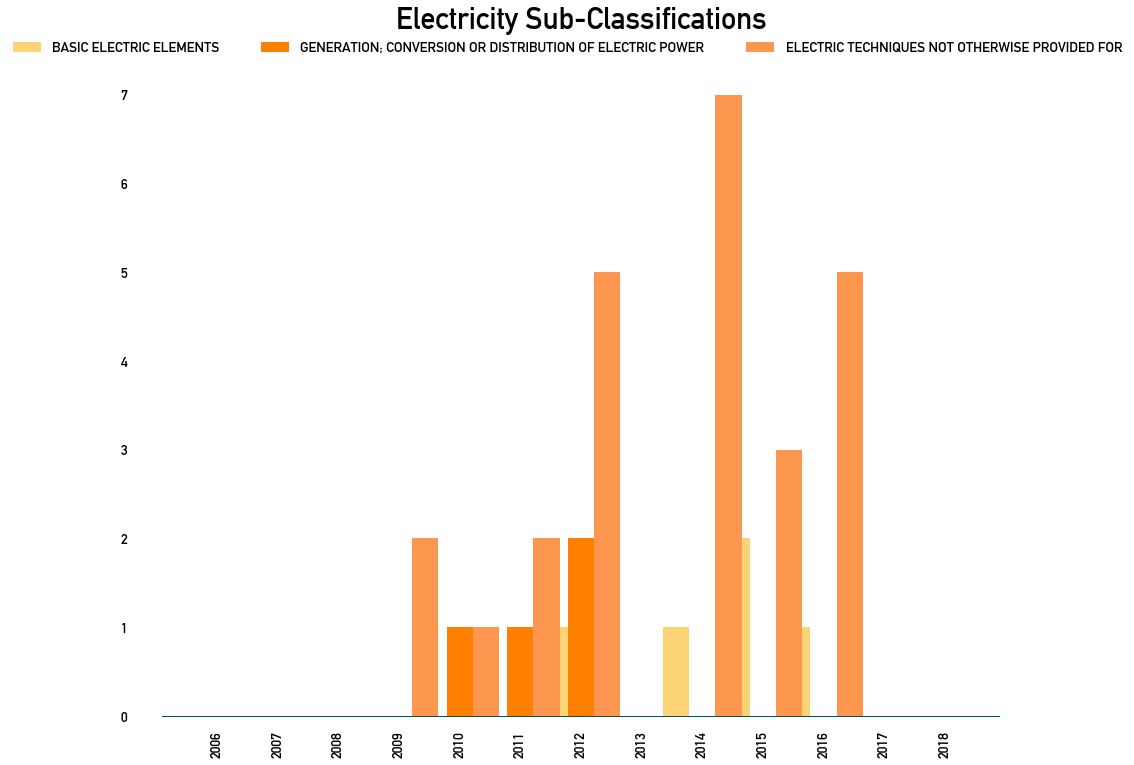

In [193]:
ax = s.plot.bar(x='year',y=[col[0],col[3],col[2]],
            stacked = False,figsize=(15,12),color=['#fdd475','#FF8000','#fd974f','#b6452c','#f9ba32'],width=1.3)

# ax.set_yscale('log',nonposy='clip')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=4, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.92),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
           bbox_transform=plt.gcf().transFigure)
plt.title("Electricity Sub-Classifications",pad = 35,loc='center',fontsize=30)

# ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()




plt.savefig('electricity.pdf',bbox_inches='tight')

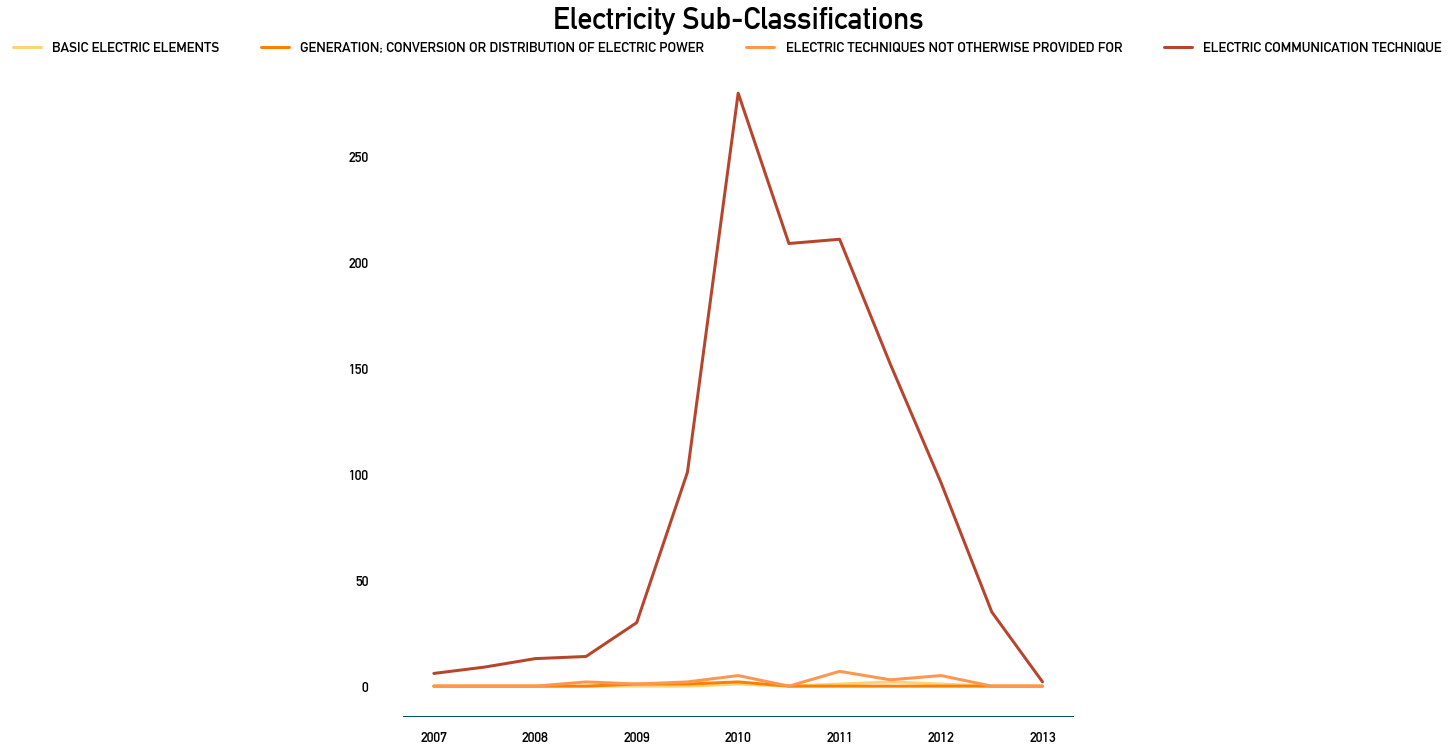

In [186]:
ax = s.plot.line(x='year',y=[col[0],col[3],col[2],col[1]],
            stacked = False,figsize=(12,12),color=['#fdd475','#FF8000','#fd974f','#b6452c','#f9ba32'])

# ax.set_yscale('log',nonposy='clip')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=4, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.92),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
           bbox_transform=plt.gcf().transFigure)
plt.title("Electricity Sub-Classifications",pad = 35,loc='center',fontsize=30)

ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()




plt.savefig('electricity.pdf',bbox_inches='tight')

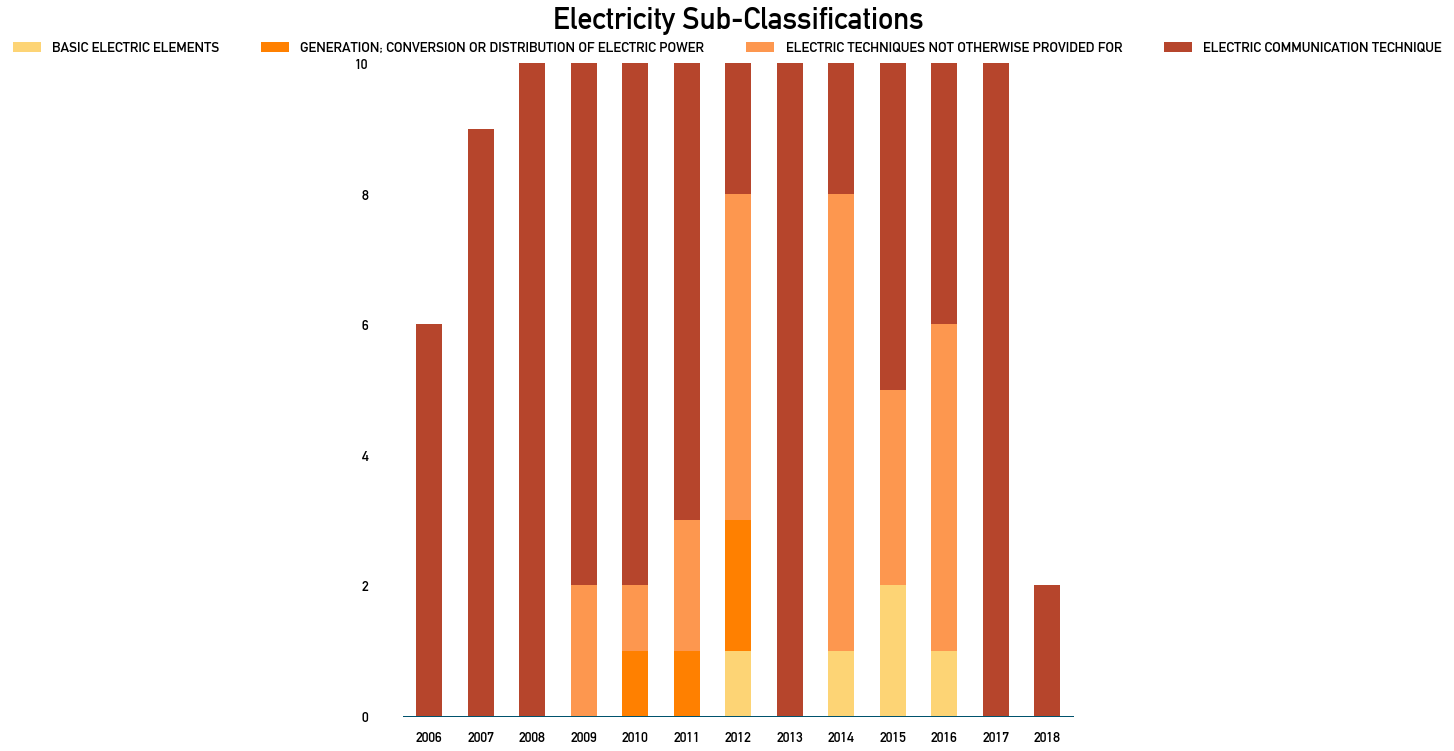

In [178]:
#zoom-in version

ax = s.plot.bar(x='year',y=[col[0],col[3],col[2],col[1]],
            stacked = True,figsize=(12,12),color=['#fdd475','#FF8000','#fd974f','#b6452c','#f9ba32'])

# ax.set_yscale('log',nonposy='clip')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=4, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.92),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
           bbox_transform=plt.gcf().transFigure)
plt.title("Electricity Sub-Classifications",pad = 35,loc='center',fontsize=30)

ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()

ax.set_ylim(0,10)




plt.savefig('electricity_zoom.pdf',bbox_inches='tight')

**PHYSICS BREAKDOWN**

In [29]:

physics = df[df.main_class =='PHYSICS']
physics.shape



(1624, 7)

In [30]:
physics.groupby('year').sub_class.value_counts()





year        sub_class                                           
2004-01-01  COMPUTING; CALCULATING; COUNTING                        4  
2006-01-01  COMPUTING; CALCULATING; COUNTING                        7  
2007-01-01  COMPUTING; CALCULATING; COUNTING                        7  
2008-01-01  COMPUTING; CALCULATING; COUNTING                        13 
2009-01-01  COMPUTING; CALCULATING; COUNTING                        31 
2010-01-01  COMPUTING; CALCULATING; COUNTING                        77 
            MEASURING; TESTING                                      1  
            MUSICAL INSTRUMENTS; ACOUSTICS                          1  
2011-01-01  COMPUTING; CALCULATING; COUNTING                        122
            EDUCATION; CRYPTOGRAPHY; DISPLAY; ADVERTISING; SEALS    2  
            MEASURING; TESTING                                      2  
            MUSICAL INSTRUMENTS; ACOUSTICS                          2  
2012-01-01  COMPUTING; CALCULATING; COUNTING                        378

In [31]:


s = physics.groupby('year').sub_class.value_counts()
s= s.unstack().fillna(0)
s= s.reset_index()
s.year = pd.to_datetime(s.year).dt.year
s

sub_class,year,CHECKING-DEVICES,COMPUTING; CALCULATING; COUNTING,EDUCATION; CRYPTOGRAPHY; DISPLAY; ADVERTISING; SEALS,INFORMATION STORAGE,MEASURING; TESTING,MUSICAL INSTRUMENTS; ACOUSTICS,OPTICS,SIGNALLING
0,2004,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2010,0.0,77.0,0.0,0.0,1.0,1.0,0.0,0.0
6,2011,0.0,122.0,2.0,0.0,2.0,2.0,0.0,0.0
7,2012,0.0,378.0,3.0,0.0,7.0,1.0,0.0,0.0
8,2013,0.0,363.0,2.0,0.0,3.0,6.0,0.0,0.0
9,2014,0.0,277.0,1.0,1.0,1.0,4.0,0.0,1.0


In [32]:
years = []
for i in range(2004,2018):
    if i != 2005:
        years.append(i)
years

col = s.columns.values.tolist()[1:]
col

['CHECKING-DEVICES',
 'COMPUTING; CALCULATING; COUNTING',
 'EDUCATION; CRYPTOGRAPHY; DISPLAY; ADVERTISING; SEALS',
 'INFORMATION STORAGE',
 'MEASURING; TESTING',
 'MUSICAL INSTRUMENTS; ACOUSTICS',
 'OPTICS',
 'SIGNALLING']

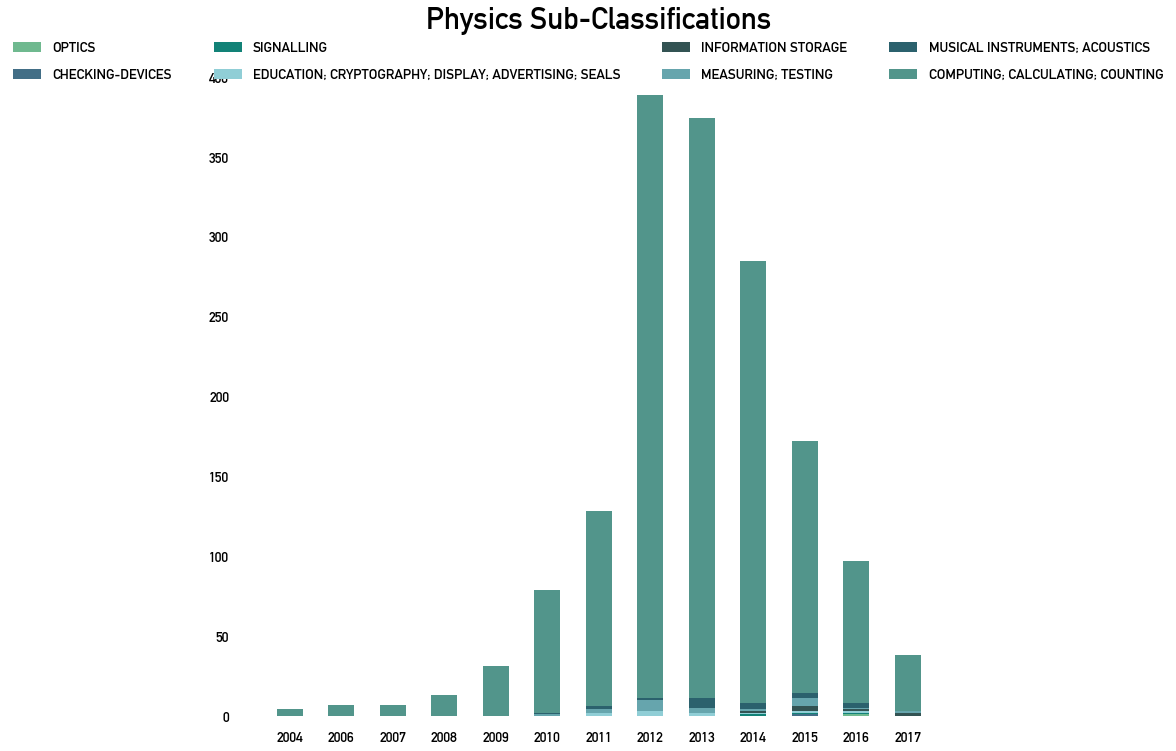

In [33]:


ax = s.plot.bar(x='year',y=[col[-2],col[0],col[-1],col[2],col[3],col[4],col[5],col[1]],
            stacked = True,figsize=(12,12),color=['#6fb98f','#426e86','#128277','#90ced6','#335353','#66a5ad',
'#2b616d','#52958b'])

# ax.set_yscale('log',nonposy='clip')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=4, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.92),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
        bbox_transform=plt.gcf().transFigure)

plt.title("Physics Sub-Classifications",pad = 35,loc='center',fontsize=30)

ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()



plt.savefig('physics1.pdf',bbox_inches='tight')


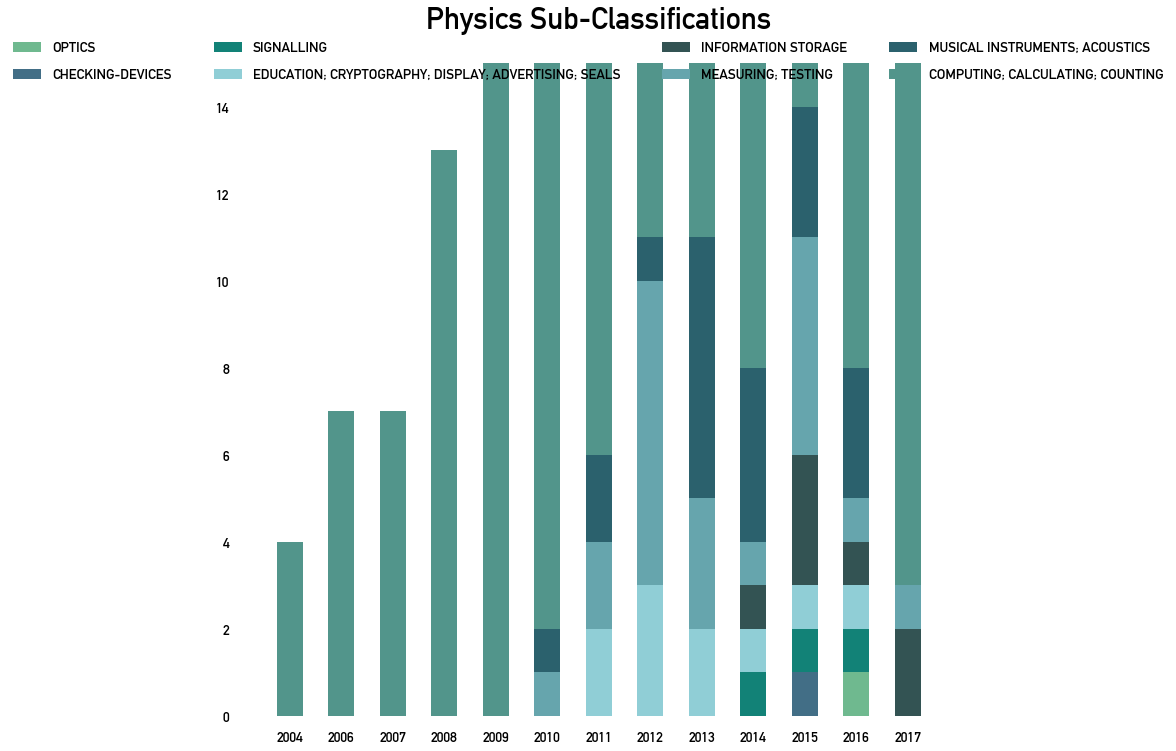

In [34]:


ax = s.plot.bar(x='year',y=[col[-2],col[0],col[-1],col[2],col[3],col[4],col[5],col[1]],
            stacked = True,figsize=(12,12),color=['#6fb98f','#426e86','#128277','#90ced6','#335353','#66a5ad',
'#2b616d','#52958b'],width = 0.5)

# ax.set_yscale('log',nonposy='clip')


ax.grid(False, axis='x')
# ax.xaxis.set_ticks_position('top')
ax.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax.yaxis.label.set_visible(False)

ax.legend(
           ncol=4, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.92),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
        bbox_transform=plt.gcf().transFigure)

plt.title("Physics Sub-Classifications",pad = 35,loc='center',fontsize=30)

ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()

ax.set_ylim(0,15)



plt.savefig('physics-zoom.pdf',bbox_inches='tight')


In [13]:
df[df.sub_class == 'MUSICAL INSTRUMENTS; ACOUSTICS']

,title,year,type,abstract,main_class,sub_class,third_class
34,Detecting distorted audio signals based on aud...,2016-01-01,Grant,An audio identification system generates a pro...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
238,Machine learning dialect identification,2016-01-01,Grant,Technology is disclosed for creating and tunin...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
241,Generating a reference audio fingerprint for a...,2016-01-01,Grant,An audio identification system generates a ref...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
327,Indexing based on time-variant transforms of a...,2015-01-01,Grant,An audio identification system generates audio...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
424,Providing intelligent transcriptions of sound ...,2015-01-01,Grant,One or more embodiments described herein inclu...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
589,Generating audio fingerprints based on audio s...,2013-01-01,Grant,An audio identification system accounts for an...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
677,Managing silence in audio signal identification,2013-01-01,Grant,An audio identification system determines whet...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
1011,Machine learning dialect identification,2015-01-01,Grant,Technology is disclosed for creating and tunin...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
1026,Generating a reference audio fingerprint for a...,2013-01-01,Grant,An audio identification system generates a ref...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...
1121,Detecting distorted audio signals based on aud...,2014-01-01,Grant,An audio identification system generates a pro...,PHYSICS,MUSICAL INSTRUMENTS; ACOUSTICS,SPEECH ANALYSIS OR SYNTHESIS; SPEECH RECOGNITI...


In [12]:
df[df.sub_class == 'MUSICAL INSTRUMENTS; ACOUSTICS'].title.to_csv('musical_instruments.csv',index=False)

## Main Classifications

In [67]:
df.head()

,title,year,type,abstract,main_class,sub_class,third_class
0,Sponsored stories and news stories within a newsfeed of a social networking system,2012-01-01,Grant,"A social networking system generates socially-relevant stories for a user based on actions taken by other users to whom the user is connected. The social networking system may receive a request for a sponsored story for a viewing user and may select information about one or more actions performed by one or more users to whom the viewing user is connected to identify one of a plurality of candidate information for a sponsored story based on one or more criteria (e.g., affinity of the viewing user for the candidates, expected value for the candidates, etc.). The social networking system may also generate the sponsored story and generate a feed comprising the sponsored story and news stories (e.g., non-sponsored stories) about one or more users of the social networking system with whom the viewing user is connected. This feed may be provided for display to the viewing user.",PHYSICS,COMPUTING; CALCULATING; COUNTING,"DATA PROCESSING SYSTEMS OR METHODS, SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES; SYSTEMS OR METHODS SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES, NOT OTHERWISE PROVIDED FOR"
1,Methods and systems for storage of media item metadata,2015-01-01,Grant,"The various embodiments described herein include methods and systems for storage of media item metadata. In one aspect, a method is performed at a server system with one or more processors and memory. The method includes receiving, from a client device, metadata corresponding to a modified media item, where the modified media item is a modified version of a media item corresponding to a particular node in a family tree within a database of media items. The method further includes, in response to receiving the metadata corresponding to the modified media item, appending, to the family tree, a new leaf node that is linked to the particular node, where the new leaf node corresponds to the modified media item.",PHYSICS,COMPUTING; CALCULATING; COUNTING,ELECTRIC DIGITAL DATA PROCESSING
2,Native application testing,2016-01-01,Grant,"In one embodiment, a method includes deploying an application to a plurality of client systems associated with a plurality of users, respectively, wherein the application is installed on each of the client systems, and wherein one or more treatments can be remotely activated on the application, receiving, from a first client system associated with a first user of the plurality of users, a request from the application installed on the first client system to access the application server, determining whether the first user belongs in a treatment group associated with a first treatment, remotely activating the first treatment on the first client system associated with the first user if the first user belongs in the treatment group, and synchronizing activation of the first treatment in response to subsequent access by the first client system.",PHYSICS,COMPUTING; CALCULATING; COUNTING,"DATA PROCESSING SYSTEMS OR METHODS, SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES; SYSTEMS OR METHODS SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES, NOT OTHERWISE PROVIDED FOR"
3,User search based on private information,2015-01-01,Grant,"In one embodiment, a method includes receiving, from a first user, a query specifying one or more criteria; accessing a data store comprising information associated with one or more users of a social-networking system; identifying a second user from a plurality of users of the social-networking system based on private information stored in the data store and the one or more criteria, wherein the private information is not viewable b

In [335]:
df.main_class.value_counts()

PHYSICS                                                         1624
ELECTRICITY                                                     1192
HUMAN NECESSITIES                                               7   
PERFORMING OPERATIONS; TRANSPORTING                             3   
MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING    2   
FIXED CONSTRUCTIONS                                             2   
Name: main_class, dtype: int64

In [130]:
main = df.main_class.value_counts().reset_index()
main.columns = ['main_class','counts']
main['pct']=main['counts']/sum(main.counts)
main['year'] = 2012


In [121]:
main.dtypes

main_class    object 
counts        int64  
pct           float64
dtype: object

In [145]:
main1 = main.T
main1 = main1.rename(columns=main1.iloc[0])
main1 = main1.drop(['main_class','counts','year'])

In [194]:
main1

,PHYSICS,ELECTRICITY,HUMAN NECESSITIES,PERFORMING OPERATIONS; TRANSPORTING,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,FIXED CONSTRUCTIONS
pct,0.573852,0.421201,0.0024735,0.00106007,0.000706714,0.000706714


In [197]:
cols = main1.columns.values.tolist()
cols

['PHYSICS',
 'ELECTRICITY',
 'HUMAN NECESSITIES',
 'PERFORMING OPERATIONS; TRANSPORTING',
 'MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING',
 'FIXED CONSTRUCTIONS']

In [168]:
plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  
  'axes.facecolor': '#ffffff',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : True,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,

  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',

  'font.size': 14.0,
  'figure.facecolor': '#ffffff',
# 'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

In [204]:
[cols[2],cols[3],cols[4],cols[5]]

['HUMAN NECESSITIES',
 'PERFORMING OPERATIONS; TRANSPORTING',
 'MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING',
 'FIXED CONSTRUCTIONS']

/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


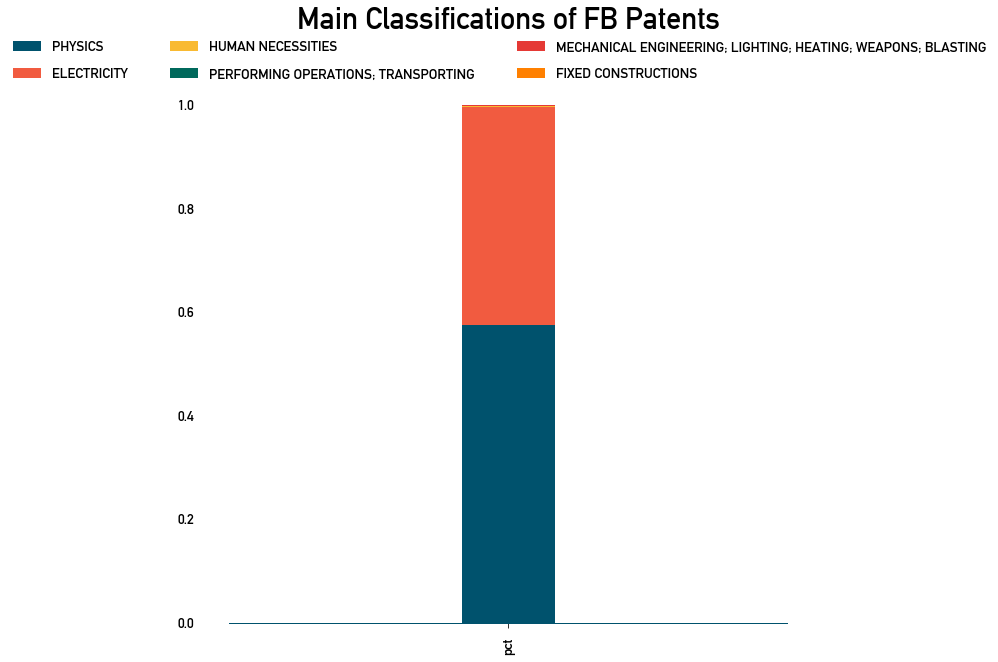

In [230]:
ax = main1.plot.bar(stacked = True,figsize = (10,10),
                       colors = ['#00526d','#f15b40','#f9ba32','#00695C','#E53935','#FF8000'],
                    width = 0.1
                )
ax.legend(
           ncol=3, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.95),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
        bbox_transform=plt.gcf().transFigure)

plt.title("Main Classifications of FB Patents",pad = 50,loc='center',fontsize=30)



ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()


plt.savefig('main_one_bar.pdf',bbox_inches='tight')

In [209]:
main1

,PHYSICS,ELECTRICITY,HUMAN NECESSITIES,PERFORMING OPERATIONS; TRANSPORTING,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,FIXED CONSTRUCTIONS
pct,0.573852,0.421201,0.0024735,0.00106007,0.000706714,0.000706714


In [210]:
main2 = main1.drop(columns=['PHYSICS','ELECTRICITY'])
main2

,HUMAN NECESSITIES,PERFORMING OPERATIONS; TRANSPORTING,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,FIXED CONSTRUCTIONS
pct,0.0024735,0.00106007,0.000706714,0.000706714


/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


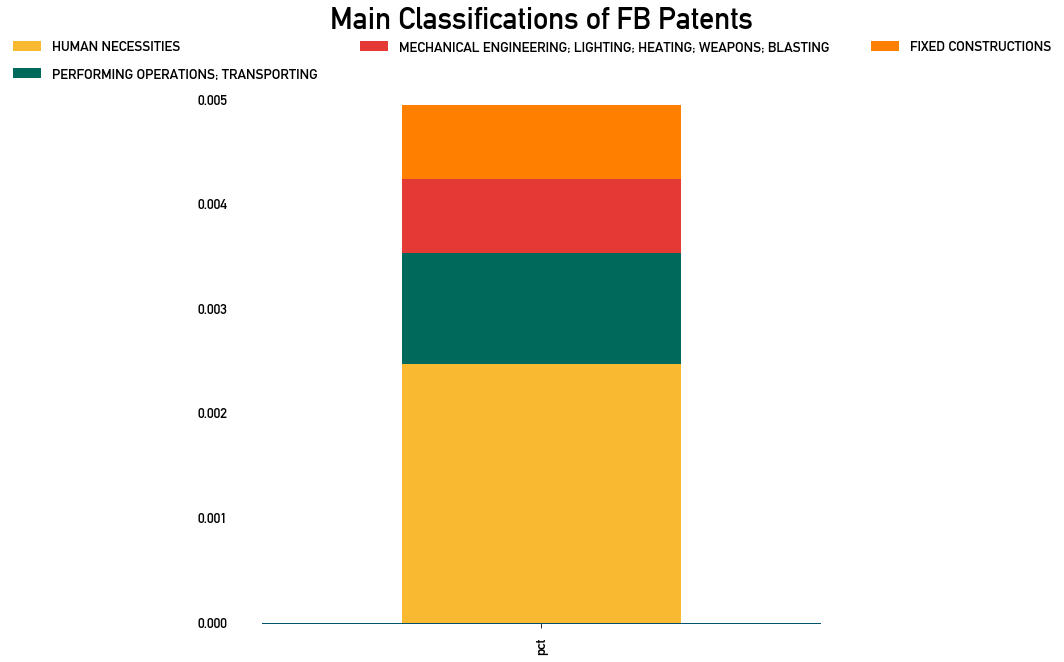

In [229]:
ax = main2.plot.bar(stacked = True,figsize = (10,10),
                       colors = ['#f9ba32','#00695C','#E53935','#FF8000'],width = 0.5)
ax.legend(
           ncol=3, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.95),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
        bbox_transform=plt.gcf().transFigure)

plt.title("Main Classifications of FB Patents",pad = 50,loc='center',fontsize=30)



ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()

plt.savefig('main_two_bar.pdf',bbox_inches='tight')

In [ ]:
ax = main1.plot.bar(stacked = True,figsize = (10,10),colors = ['#00526d','#f15b40','#f9ba32','#00695C','#E53935','#FF8000'])
ax.legend(
           ncol=3, 
           loc=9, #‘upper center’
           bbox_to_anchor=(0.5, 0.95),
           frameon=False,
           columnspacing=3,
           labelspacing=1,
        bbox_transform=plt.gcf().transFigure)

plt.title("Main Classifications of FB Patents",pad = 50,loc='center',fontsize=30)



ax.grid(False, axis='x')

ax.set_xlabel("")

plt.minorticks_off()


plt.savefig('main_one_bar.pdf',bbox_inches='tight')

## Electricity Classifications
### Treemap

In [236]:
elec_count = elec.sub_class.value_counts().reset_index()
elec_count.columns = ['sub_class','counts']
elec_count['pct']=elec_count['counts']/sum(elec_count.counts)
elec_count

,sub_class,counts,pct
0,ELECTRIC COMMUNICATION TECHNIQUE,1158,0.971477
1,ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR,25,0.020973
2,BASIC ELECTRIC ELEMENTS,5,0.004195
3,GENERATION; CONVERSION OR DISTRIBUTION OF ELECTRIC POWER,4,0.003356


In [252]:
new_row= pd.DataFrame({'sub_class' : ['all the rest'],
                       'counts':[34],
                       'pct':[1-0.971477]})

/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


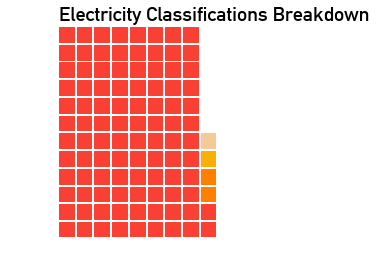

In [304]:
#create a waffle chart for each catagory:
from pywaffle import Waffle

data = elec_count[['sub_class','pct']]
fig = plt.figure(
    FigureClass=Waffle, 
    rows=12, 
    values=elec_count.pct*100, 
    colors=('#fa4032','#FF8000','#faaf08','#f5ca99'),
    title={'label': 'Electricity Classifications Breakdown', 'loc': 'left'},
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  
)

plt.show()


fig.savefig('electricity1.pdf')

In [324]:
elec[elec.sub_class == '']

,title,year,type,abstract,main_class,sub_class,third_class
130,Circuit board actuator system,2015-01-01,Grant,"Technology is provided for circuit board actuator systems for ejecting and inserting a circuit board into a circuit board connector. The actuator system includes a cross-member attached to a circuit board and a pair of levers pivotably coupled to opposite end portions of the cross-member. Each lever is moveable between a closed position and an open position and includes an arm with an insertion pawl and an ejector pawl extending from the arm. The system further includes a pair of circuit board guides, each including a keeper and mountable adjacent a circuit board connector. The insertion pawls operate against the keepers to insert the circuit board into the connector when the levers are moved toward the closed position, and the ejector pawls operate against the keepers to eject the circuit board from the connector when the levers are moved toward the open position.",ELECTRICITY,BASIC ELECTRIC ELEMENTS,LINE CONNECTORS; CURRENT COLLECTORS
218,Waveguides for digital communication devices,2015-01-01,Grant,"Various of the disclosed embodiments use ITO and ITO-like materials or structures to serve as a waveguide for device communications, e.g., for mobile phone communication. Various embodiments employ an economical design, wherein one or more wireless antennas are integrated into or in conjunction with the display of a communications device as a waveguide antenna. The waveguide may use space more economically than traditional designs. In some embodiments, the waveguide can provide a wider range of viable operational frequencies. Additionally, in some embodiments, a square surface area of the waveguide optimizes the area to length ratio, which may reduce the resistance when the structure includes a lossy material. The waveguide antenna may be composed of ITO or ITO-like materials, which facilitate waveguide propagation while retaining a visually transparent character.",ELECTRICITY,BASIC ELECTRIC ELEMENTS,"ANTENNAS, i.e. RADIO AERIALS"
290,Multi-node server platform,2016-01-01,Grant,A multi-node server platform including a cubby chassis and at least one multi-server sled. The cubby chassis includes partitions defining a plurality of sled positions. The multi-server sled includes a chassis having a vertical sidewall and a horizontal bottom wall with an open top and an open side. A side-plane PCB is mounted to the vertical sidewall and a plurality of dividers are attached to the bottom wall and oriented perpendicular to the side-plane PCB. One or more server cards are connected to the side-plane PCB and are supported the plurality of dividers. The server cards include a server PCB having a first side facing the bottom wall and an outward facing second side enclosing the open top of the sled chassis. A cover is coupled to the horizontal bottom wall to enclose the open side of the sled chassis and help direct airflow across the server cards.,ELECTRICITY,BASIC ELECTRIC ELEMENTS,LINE CONNECTORS; CURRENT COLLECTORS
1046,Floating bus bar and connector within chassis and powered slide rails,2014-01-01,Grant,"Technology is provided for a powered slide rail. The powered slide rail includes an outer segment including a first elongate conductor, a middle segment slidably nested with the outer segment that includes a second elongate conductor, and a first conductive element connected to the second elongate conductor and positioned for sliding contact with the first elongate conductor. An inner segment is slidably nested with the middle segment and includes a second conductive element positioned for sliding contact with the second elongate conductor.",ELECTRICITY,BASIC ELECTRIC ELEMENTS,LINE CONNECTORS; CURRENT COLLECTORS
1727,Floating bus bar connector,2012-01-01,Grant,"A floating bus bar connector connects a computing asset to bus bars using a connecting clip and a conducting terminal that is coupled to the connecting clip and to an elec

In [317]:
elec[elec.sub_class == 'BASIC ELECTRIC ELEMENT']

,title,year,type,abstract,main_class,sub_class,third_class


(0.0, 100.0, 0.0, 100.0)

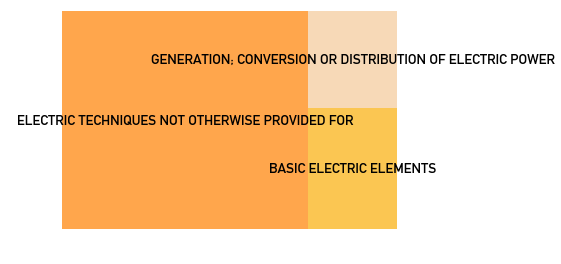

In [311]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# # If you have 2 lists
ax = squarify.plot(sizes=elec_count_2.counts, label = elec_count_2['sub_class'], alpha=.7,
                   color=['#FF8000','#faaf08','#f5ca99']) 

plt.axis('off')




# plt.savefig("treemap.pdf",bbox_inches='tight')
# plt.savefig('treemap.png',dpi = 600, bbox_inches='tight')

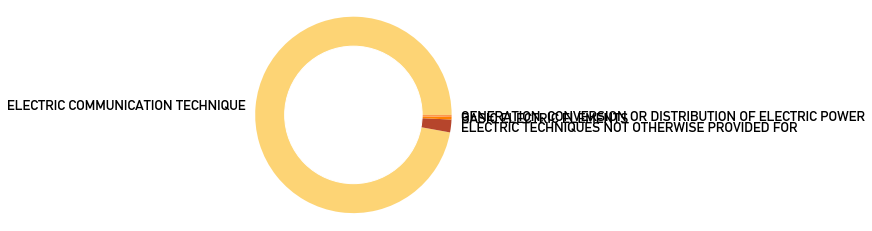

In [38]:
#donut chart
names=elec_count.sub_class
size=elec_count.counts
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')


# Give color names
plt.pie(size, labels=names, colors=['#fdd475','#b6452c','#FF8000','#fd974f'])
plt.axis('equal') 
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

 
# # Custom colors --> colors will cycle
# plt.pie(size, labels=names, colors=['red','green'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()


## Physics Classifications

In [58]:
physics_count = physics.sub_class.value_counts().reset_index()
physics_count
physics_count['pct']=physics_count['sub_class']/sum(physics_count.sub_class)
physics_count

,index,sub_class,pct
0,COMPUTING; CALCULATING; COUNTING,1561,0.961207
1,MEASURING; TESTING,21,0.012931
2,MUSICAL INSTRUMENTS; ACOUSTICS,20,0.012315
3,EDUCATION; CRYPTOGRAPHY; DISPLAY; ADVERTISING; SEALS,10,0.006158
4,INFORMATION STORAGE,7,0.004310
5,SIGNALLING,3,0.001847
6,OPTICS,1,0.000616
7,CHECKING-DEVICES,1,0.000616


/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


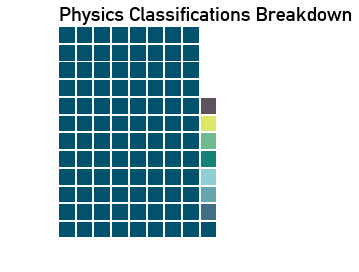

In [333]:


#create a waffle chart for each catagory:
from pywaffle import Waffle

data = physics_count[['sub_class','pct']]
fig = plt.figure(
    FigureClass=Waffle, 
    rows=12, 
    values=physics_count.pct*100, 
    colors=('#00526d','#426e86','#66a5ad','#90ced6','#128277',
'#6fb98f','#dfe666','#5d535e'),
    title={'label': 'Physics Classifications Breakdown', 'loc': 'left'},
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  
)

plt.show()


fig.savefig('physics1.pdf')